In [355]:
# Project Description

#I chose the **Phishing Website Dataset** from Kaggle because it is directly relevant to cybersecurity — an increasingly important field that affects everyone. This dataset contains features extracted from real websites and aims to classify whether a given website is legitimate or a phishing attempt.

#This project is interesting because it shows how various small attributes (like the presence of an IP address, abnormal URLs, or HTTPS usage) can reveal malicious intent. Analyzing these features can help improve digital safety and deepen understanding of online threats.


In [356]:
# ## 2️⃣ System Stage – Phishing Website Dataset

# - **File name:** phishing.csv  
# - **File size:** Approximately a few MB  
# - **File type:** CSV (Comma-Separated Values)  
# - **Source:** Kaggle - Phishing Website Detector  
# - **Protocol:** Downloaded via HTTPS  
# - **Versioning:**  
#   - Only one file provided; no formal versions  
#   - Project version control is managed via Git  


In [357]:
# ## 3️⃣ Metadata

# - **Data Types:**  
#   All features are binary (0 or 1), with the target column named `class`:  
#   - `1` = legitimate website  
#   - `-1` = phishing website  

# - **Missing Values:**  
#   No missing values were found in this dataset. All rows are complete and usable for modeling.

# - **Special Values:**  
#   No special placeholder values (like “unknown” or -999) were found. The data is clean and well-formatted for direct use in machine learning.

# ---

# ### Feature Explanation for Phishing Website Dataset

# | Feature Name        | Description                                                                                   |
# |---------------------|-----------------------------------------------------------------------------------------------|
# | **Index**           | A unique identifier or serial number for each sample (not used in modeling).                   |
# | **UsingIP**         | Whether the website URL uses an IP address instead of a domain name (1 = yes, -1 = no).        |
# | **LongURL**         | Whether the URL is unusually long (1 = yes, -1 = no).                                         |
# | **ShortURL**        | Whether the URL is suspiciously short (1 = yes, -1 = no).                                     |
# | **Symbol@**         | Presence of '@' symbol in URL (1 = yes, -1 = no).                                             |
# | **Redirecting//**   | Whether the URL contains '//' after the protocol part (1 = yes, -1 = no).                      |
# | **PrefixSuffix-**   | Use of hyphen '-' in the domain name (1 = yes, -1 = no).                                      |
# | **SubDomains**      | Number of subdomains (1 = more subdomains than usual, -1 = normal).                            |
# | **HTTPS**           | Whether the website uses HTTPS protocol (1 = yes, -1 = no).                                   |
# | **DomainRegLen**    | Length of domain registration (1 = short registration period, -1 = long).                      |
# | **Favicon**         | Whether the favicon is loaded from the same domain (1 = yes, -1 = no).                        |
# | **NonStdPort**      | Use of non-standard port in URL (1 = yes, -1 = no).                                           |
# | **HTTPSDomainURL**  | Whether HTTPS is present in the domain name part of the URL (1 = yes, -1 = no).               |
# | **RequestURL**      | Whether resources are loaded from an external domain (1 = yes, -1 = no).                      |
# | **AnchorURL**       | Whether anchor tags link to external domains (1 = yes, -1 = no).                             |
# | **LinksInScriptTags** | Presence of links inside script tags (1 = yes, -1 = no).                                    |
# | **ServerFormHandler** | Whether the form handler is on an external server (1 = yes, -1 = no).                       |
# | **InfoEmail**       | Whether the website contains email information (1 = yes, -1 = no).                           |
# | **AbnormalURL**     | Whether the URL has abnormalities (1 = yes, -1 = no).                                        |
# | **WebsiteForwarding** | Whether the website forwards to another URL (1 = yes, -1 = no).                            |
# | **StatusBarCust**   | Whether the status bar is customized (1 = yes, -1 = no).                                     |
# | **DisableRightClick** | Whether right-click is disabled (1 = yes, -1 = no).                                        |
# | **UsingPopupWindow** | Presence of popup windows (1 = yes, -1 = no).                                               |
# | **IframeRedirection** | Use of iframes for redirection (1 = yes, -1 = no).                                          |
# | **AgeofDomain**     | Domain age (1 = young domain, -1 = old).                                                     |
# | **DNSRecording**    | Whether the domain is recorded in DNS (1 = yes, -1 = no).                                   |
# | **WebsiteTraffic**  | Website traffic rank (1 = low traffic, -1 = high).                                          |
# | **PageRank**        | Page rank of the website (1 = low, -1 = high).                                              |
# | **GoogleIndex**     | Whether the website is indexed by Google (1 = no, -1 = yes).                                |
# | **LinksPointingToPage** | Number of links pointing to the page (1 = few, -1 = many).                              |
# | **StatsReport**     | Whether there are statistical reports about the site (1 = no, -1 = yes).                    |
# | **class**           | Target variable: `1` = legitimate website, `-1` = phishing website.                         |



In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [359]:
df = pd.read_csv("phishing.csv")
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [360]:
# Example: Count how many times each label appears in the target column
df['class'].value_counts()


class
 1    6157
-1    4897
Name: count, dtype: int64

In [361]:
df.nunique()


Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

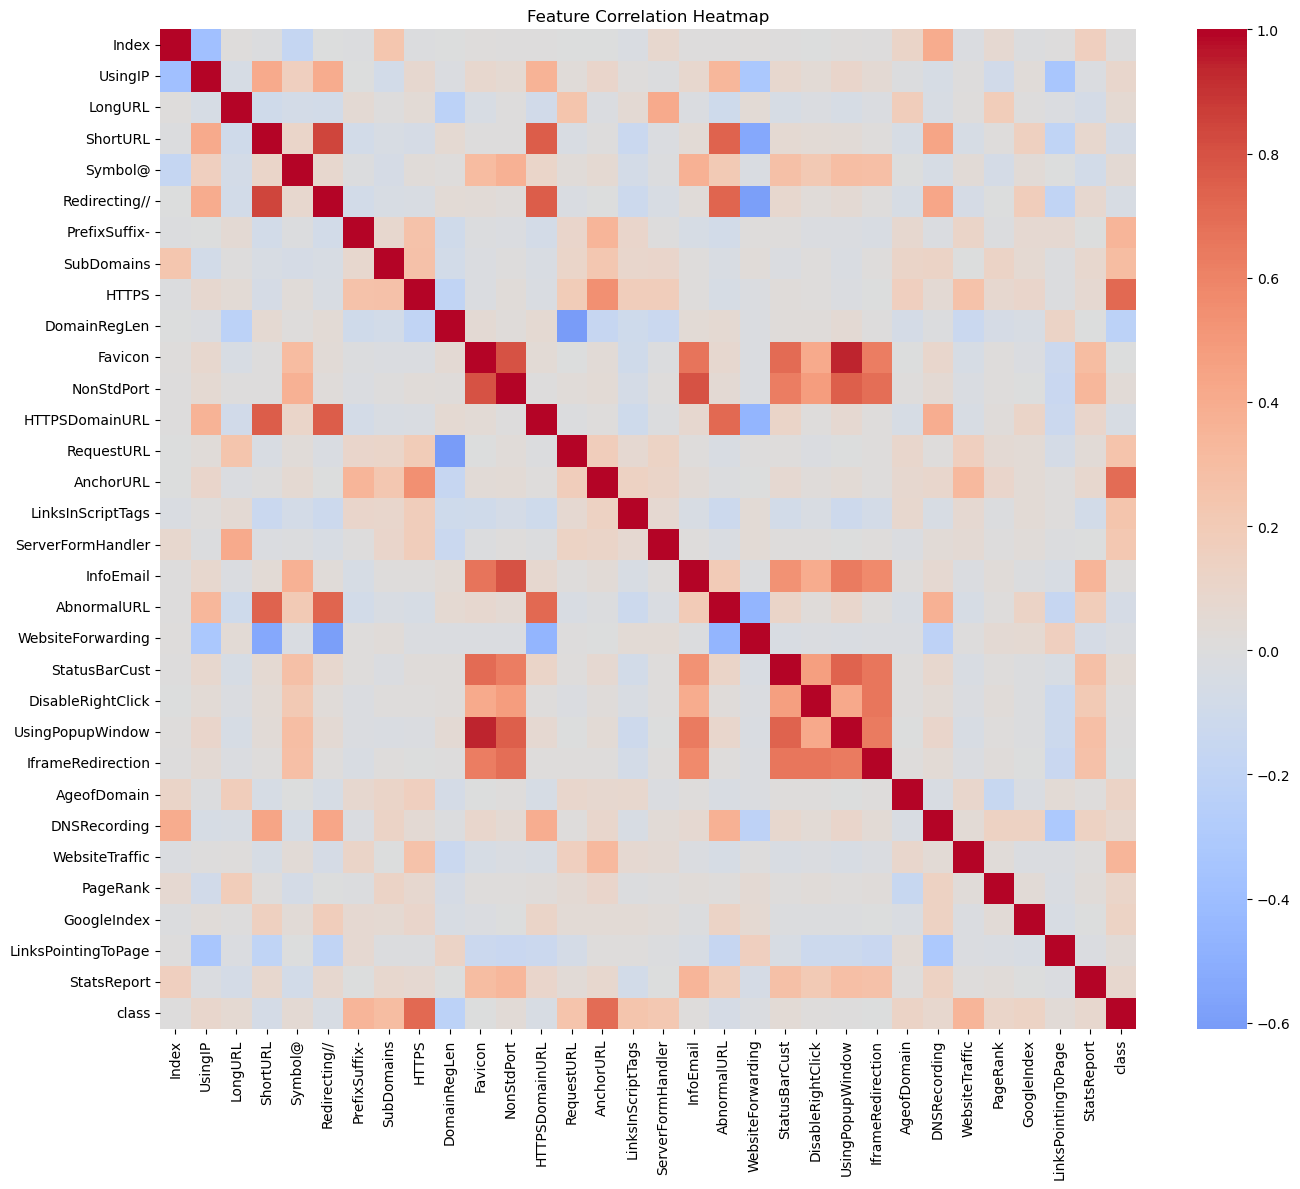

In [362]:
# Compute correlation matrix on the current DataFrame (excluding non-numeric columns if any)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [363]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [364]:
for col in X.columns:
    unique_vals = X[col].nunique()
    print(f"Feature '{col}' has {unique_vals} unique values.")

Feature 'UsingIP' has 2 unique values.
Feature 'LongURL' has 3 unique values.
Feature 'ShortURL' has 2 unique values.
Feature 'Symbol@' has 2 unique values.
Feature 'Redirecting//' has 2 unique values.
Feature 'PrefixSuffix-' has 2 unique values.
Feature 'SubDomains' has 3 unique values.
Feature 'HTTPS' has 3 unique values.
Feature 'DomainRegLen' has 2 unique values.
Feature 'Favicon' has 2 unique values.
Feature 'HTTPSDomainURL' has 2 unique values.
Feature 'RequestURL' has 2 unique values.
Feature 'AnchorURL' has 3 unique values.
Feature 'LinksInScriptTags' has 3 unique values.
Feature 'ServerFormHandler' has 3 unique values.
Feature 'AbnormalURL' has 2 unique values.
Feature 'UsingPopupWindow' has 2 unique values.
Feature 'DNSRecording' has 2 unique values.
Feature 'WebsiteTraffic' has 3 unique values.
Feature 'PageRank' has 2 unique values.
Feature 'GoogleIndex' has 2 unique values.
Feature 'LinksPointingToPage' has 3 unique values.


In [365]:
# we can see that favicon and using popupwindow are highly correlated, so we can drop one of them.
# PCA wont work well here because alot of the features arent correlated. 

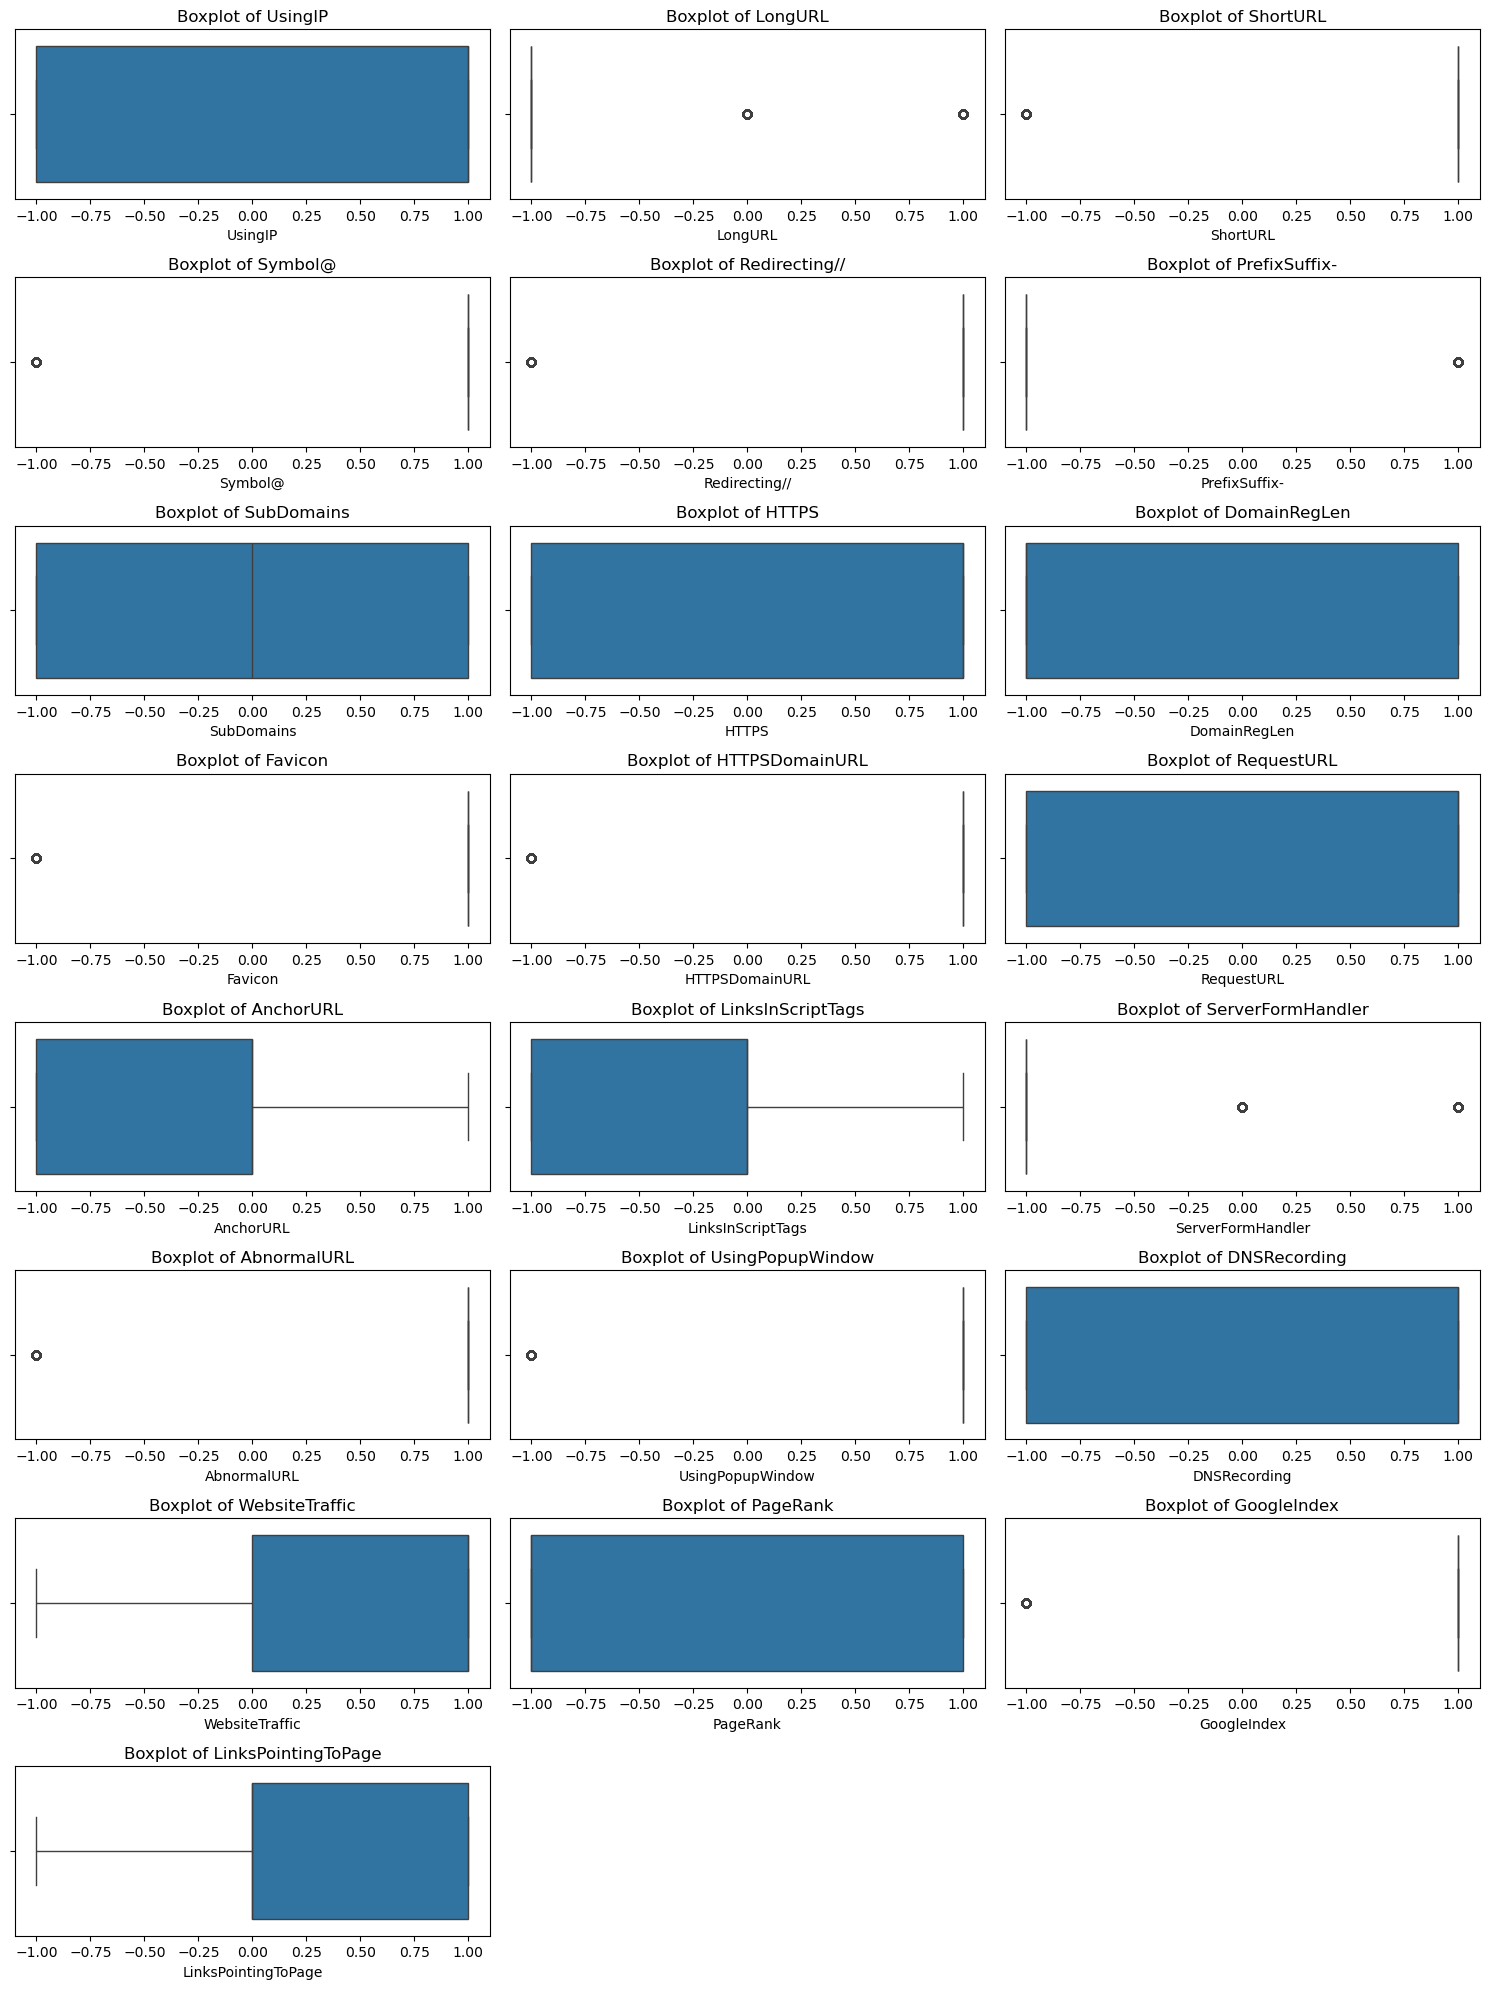

{-1: 855, 1: 7988}


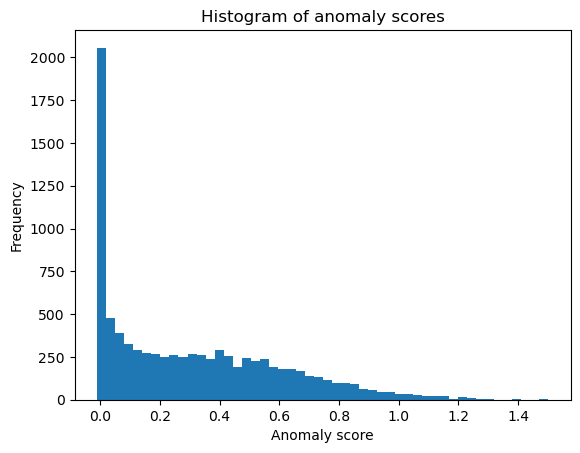

In [366]:
## Outlier Analysis

### 1. Outliers in Individual Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns)//3 + 1, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 2. Anomaly Detection with One-Class SVM
from sklearn import svm
import numpy as np

# Assuming X_train_scaled is your scaled training data with normal samples
# If you don't have a separate normal dataset, use the training set as normal
clf = svm.OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train_scaled)

# Predict anomalies (-1 means anomaly, +1 means normal)
y_pred = clf.predict(X_train_scaled)

# Count predicted anomalies and normal points
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

# Optional: visualize anomaly scores histogram
import matplotlib.pyplot as plt

scores = clf.decision_function(X_train_scaled)  # The lower, the more abnormal
plt.hist(scores, bins=50)
plt.title('Histogram of anomaly scores')
plt.xlabel('Anomaly score')
plt.ylabel('Frequency')
plt.show()


{-1: 443, 1: 8400}


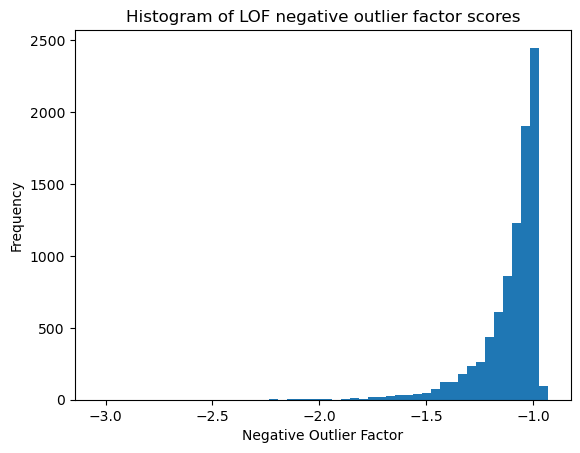

In [367]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Create LOF model
# Note: LOF doesn't have a fit_predict split; it fits and predicts in one call
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # contamination = expected outlier fraction

# Fit and predict on the training data
y_pred = lof.fit_predict(X_train_scaled)  # +1 = inlier, -1 = outlier

# Count the inliers and outliers
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

# LOF negative outlier factor (lower means more abnormal)
scores = lof.negative_outlier_factor_

# Visualize anomaly scores histogram
plt.hist(scores, bins=50)
plt.title('Histogram of LOF negative outlier factor scores')
plt.xlabel('Negative Outlier Factor')
plt.ylabel('Frequency')
plt.show()

In [368]:
from sklearn.covariance import EllipticEnvelope
import numpy as np
import warnings

# Suppress only the specific RuntimeWarnings (like determinant increasing)
warnings.filterwarnings("ignore", category=RuntimeWarning)

try:
    clf = EllipticEnvelope(contamination=0.05, random_state=42)
    clf.fit(X_train_scaled)

    y_pred = clf.predict(X_train_scaled)
    results = dict(zip(*np.unique(y_pred, return_counts=True)))
    print("✅ Elliptic Envelope results (on X_train_scaled):", results)

except ValueError as ve:
    print("❌ ValueError:", ve)
except Exception as e:
    print("❌ Unexpected error:", e)


✅ Elliptic Envelope results (on X_train_scaled): {-1: 443, 1: 8400}


In [369]:
features_to_remove = [
    'Index',               # Just a row ID
    'AgeofDomain',         # May be missing or unreliable
    'DisableRightClick',   # Many legitimate sites also disable right-click
    'IframeRedirection',   # Used on both phishing and legit sites
    'StatusBarCust',       # Many legit sites customize the status bar
    'StatsReport',         # May contain outdated or irrelevant stats
    'NonStdPort',          # Rarely used and may not be useful
    'WebsiteForwarding',   # Unreliable for classification
    'InfoEmail',   # Just the presence of email, weak signal   
    'Favicon'     #correlated with usingpopupwindow
    'UsingPopupWindow'  # Many legitimate sites use popups for various reasons....
]

# Separate target first before dropping
y = df['class']

# Drop only columns that exist and exclude 'class' from dropping here
cols_to_drop = [col for col in features_to_remove if col in df.columns]
X = df.drop(columns=cols_to_drop + ['class'])  # drop unwanted features and the target column
X.columns


Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'UsingPopupWindow', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage'],
      dtype='object')

In [370]:
# Optional: remove outliers using Isolation Forest (contamination=0.01)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso.fit_predict(X)
mask_inliers = outlier_flags == 1

X, y = X.loc[mask_inliers], y.loc[mask_inliers]  # Use .loc for label-based filtering



In [371]:
import numpy as np

# Define the k parameter for Chebyshev's inequality (e.g., k=3 for 3 standard deviations)
k = 3

# Calculate mean and std for each feature
means = X.mean()
stds = X.std()

# Compute the boolean mask for each feature where values are within k std deviations
mask = ((X - means).abs() <= k * stds).all(axis=1)

# Filter X and y to keep only inliers
X_filtered = X.loc[mask]
y_filtered = y.loc[mask]

print(f"Removed {len(X) - len(X_filtered)} outliers based on Chebyshev inequality with k={k}")

# Now X_filtered and y_filtered contain your data without those outliers
 

Removed 0 outliers based on Chebyshev inequality with k=3


In [372]:
from scipy.stats import zscore

z_scores = X.apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("Outliers per column:\n", outliers)


Outliers per column:
 UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
AbnormalURL            0
UsingPopupWindow       0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
dtype: int64


In [373]:
# # Outlier Detection using Chebyshev's Inequality

# After applying outlier detection using Chebyshev's inequality with a threshold of *k* standard deviations, **no data points were removed**. 

# This indicates that the dataset does not contain extreme outliers, and all observations fall within the expected range based on their feature distributions. 

# Therefore, the dataset can be considered **clean with respect to extreme values**.


Number of anomalies detected: 443


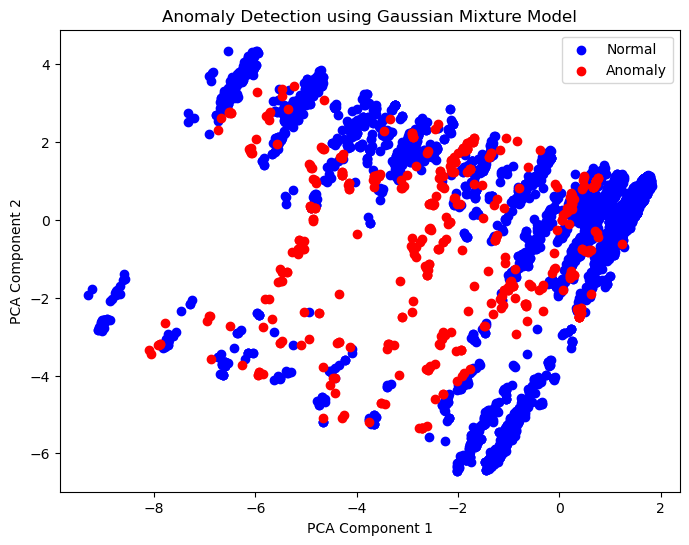

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Assume X_train_scaled is your scaled data

# Step 1: Fit GMM with n components (try 1 or more clusters)
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(X_train_scaled)

# Step 2: Compute log-likelihood of each sample (higher = more normal)
log_likelihood = gmm.score_samples(X_train_scaled)

# Step 3: Define anomaly threshold (e.g., lower 5% likelihood)
threshold = np.percentile(log_likelihood, 5)

# Predict anomalies: True if likelihood below threshold
anomalies = log_likelihood < threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Step 4: Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_train_scaled)

# Step 5: Plot normal points and anomalies
plt.figure(figsize=(8,6))
plt.scatter(X_2d[~anomalies, 0], X_2d[~anomalies, 1], c='blue', label='Normal')
plt.scatter(X_2d[anomalies, 0], X_2d[anomalies, 1], c='red', label='Anomaly')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Anomaly Detection using Gaussian Mixture Model")
plt.legend()
plt.show()


In [375]:
# I wont remove these outliers cause tthe model is already preforming well , if we remove them our model will be overfitted to the data and will not generalize well to new data.

In [376]:
X.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
AbnormalURL            int64
UsingPopupWindow       int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
dtype: object

In [377]:
print("Dataset shape:", X.shape)
X.info()

Dataset shape: (10943, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 10943 entries, 0 to 11053
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              10943 non-null  int64
 1   LongURL              10943 non-null  int64
 2   ShortURL             10943 non-null  int64
 3   Symbol@              10943 non-null  int64
 4   Redirecting//        10943 non-null  int64
 5   PrefixSuffix-        10943 non-null  int64
 6   SubDomains           10943 non-null  int64
 7   HTTPS                10943 non-null  int64
 8   DomainRegLen         10943 non-null  int64
 9   Favicon              10943 non-null  int64
 10  HTTPSDomainURL       10943 non-null  int64
 11  RequestURL           10943 non-null  int64
 12  AnchorURL            10943 non-null  int64
 13  LinksInScriptTags    10943 non-null  int64
 14  ServerFormHandler    10943 non-null  int64
 15  AbnormalURL          10943 non-null  int64
 16  

In [378]:
X.describe()


,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,AnchorURL,LinksInScriptTags,ServerFormHandler,AbnormalURL,UsingPopupWindow,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage
count,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,...,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000
mean,0.321941,-0.642603,0.752353,0.712693,0.758567,-0.738828,0.063328,0.255689,-0.336379,0.638673,...,-0.075939,-0.123823,-0.601023,0.721649,0.624966,0.387371,0.288586,-0.490999,0.731701,0.342593
std,0.946803,0.758141,0.658790,0.701508,0.651625,0.673924,0.818199,0.910377,0.941770,0.769513,...,0.713469,0.760788,0.755415,0.692291,0.780688,0.921966,0.827502,0.871200,0.681657,0.567232
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Class distribution:
class
 1    6101
-1    4842
Name: count, dtype: int64


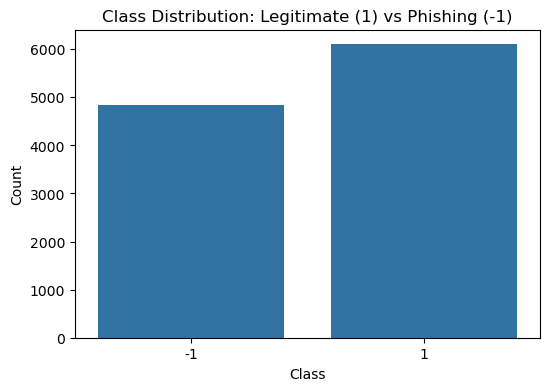

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print class distribution
print("\nClass distribution:")
print(y.value_counts())

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution: Legitimate (1) vs Phishing (-1)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


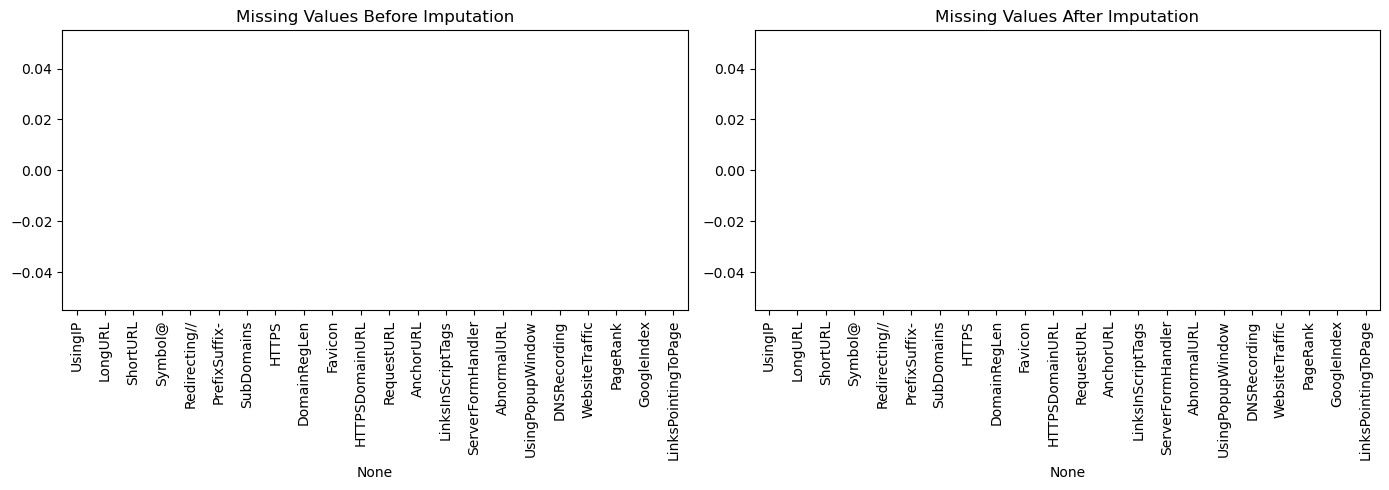

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

# Count missing values before imputation
missing_before = X.isnull().sum()

# Impute missing values (returns NumPy array)
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

# Count missing values after imputation
missing_after = X_imputed.isnull().sum()

# Plot missing values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=missing_before.index, y=missing_before.values, color='skyblue')
plt.title("Missing Values Before Imputation")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=missing_after.index, y=missing_after.values, color='lightgreen')
plt.title("Missing Values After Imputation")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


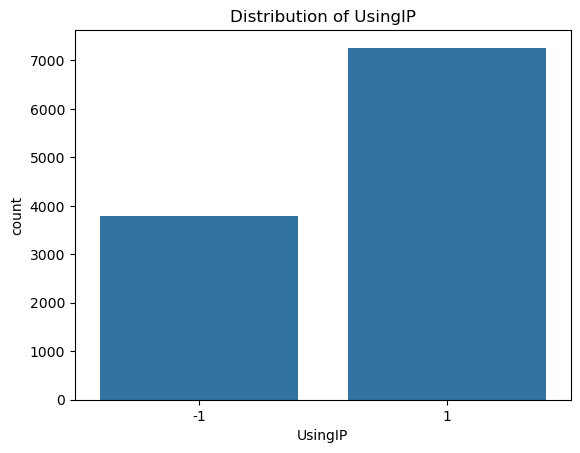

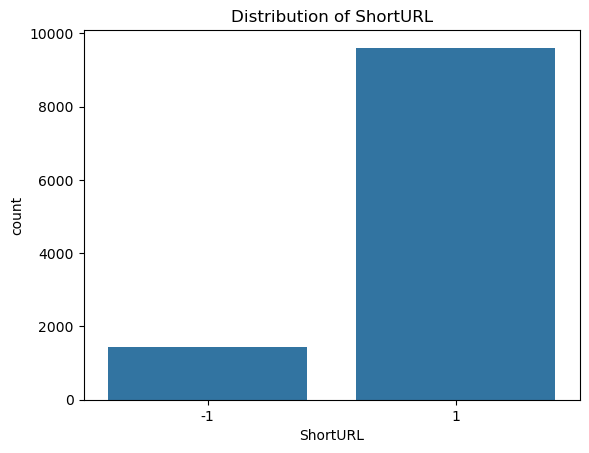

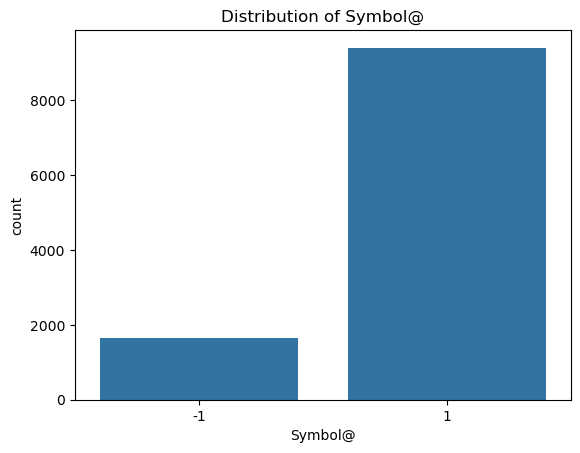

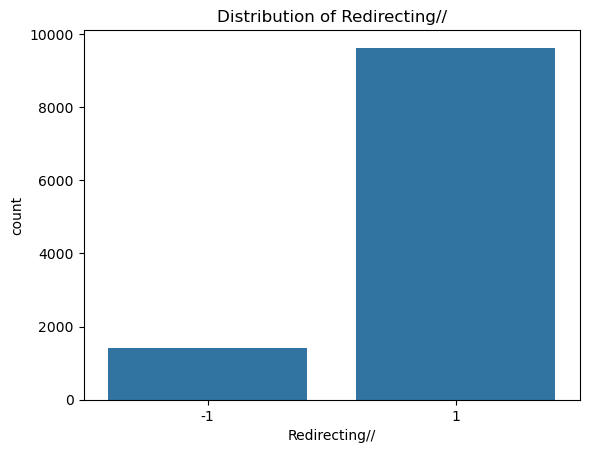

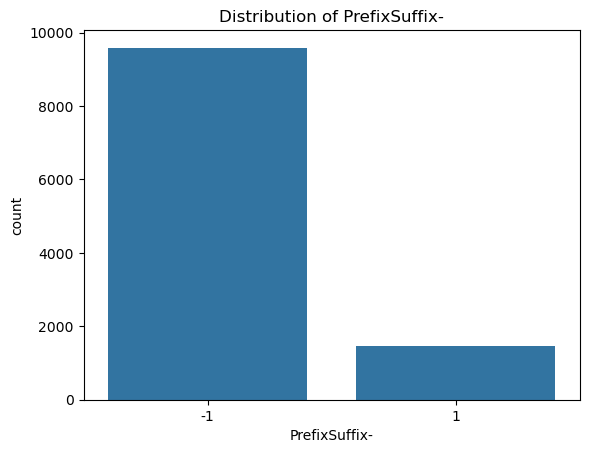

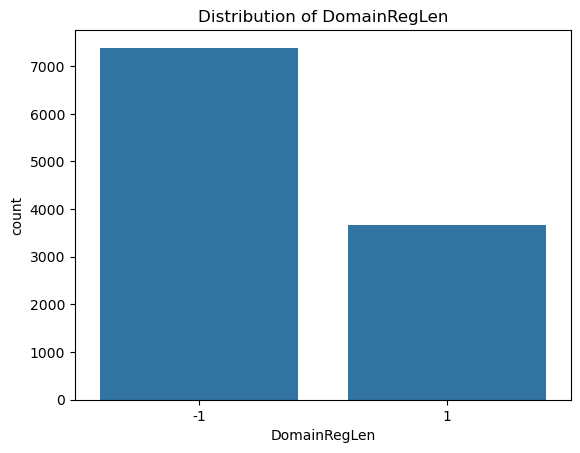

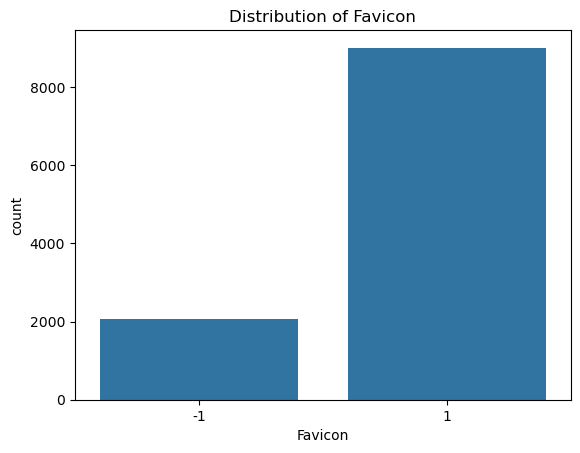

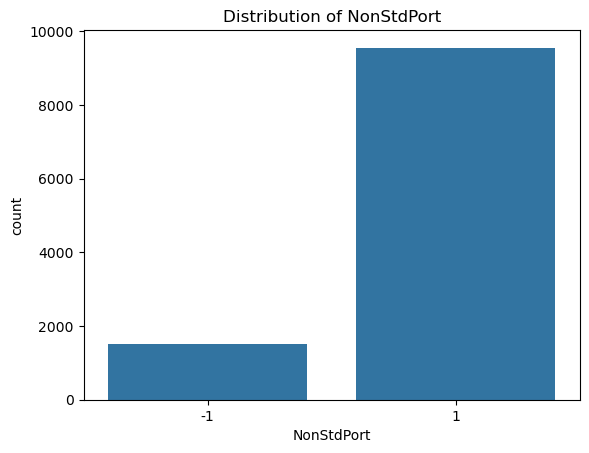

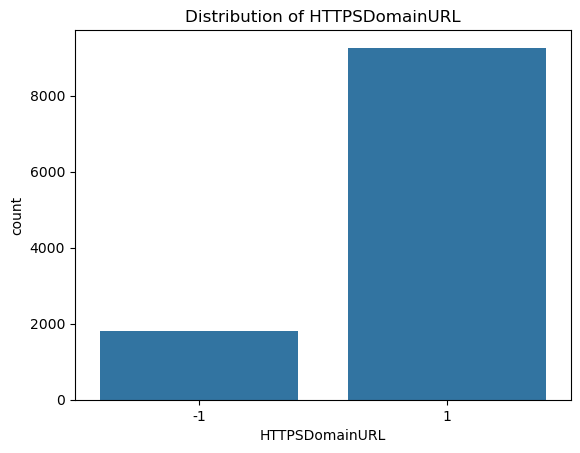

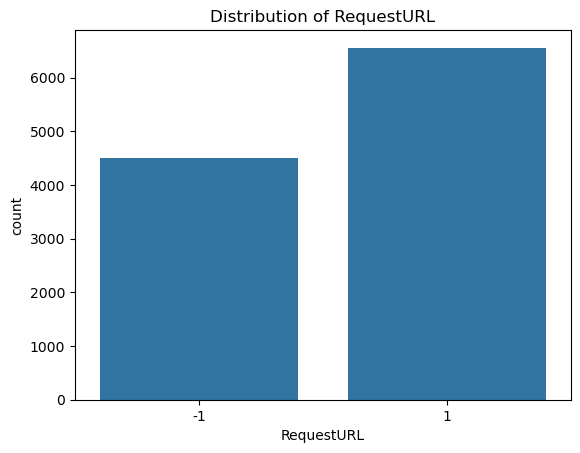

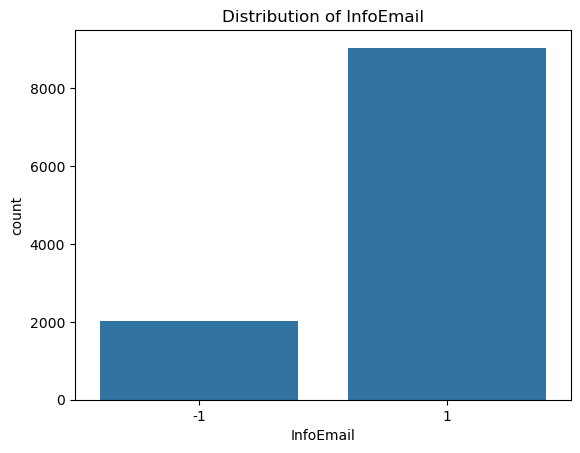

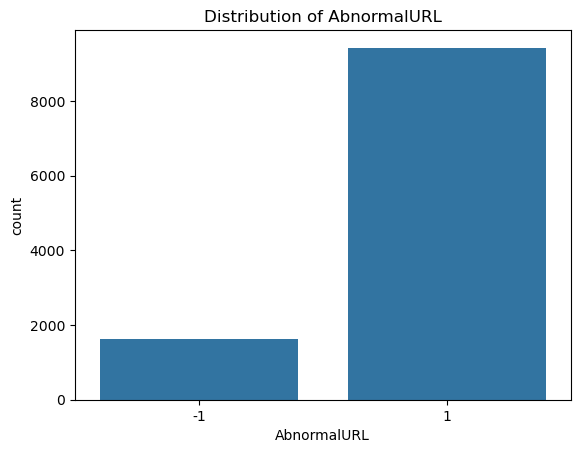

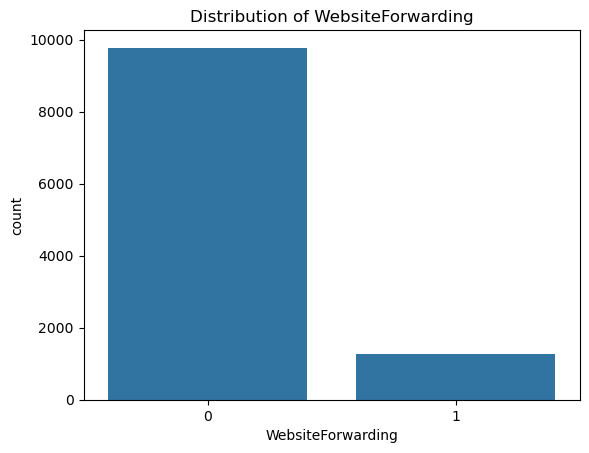

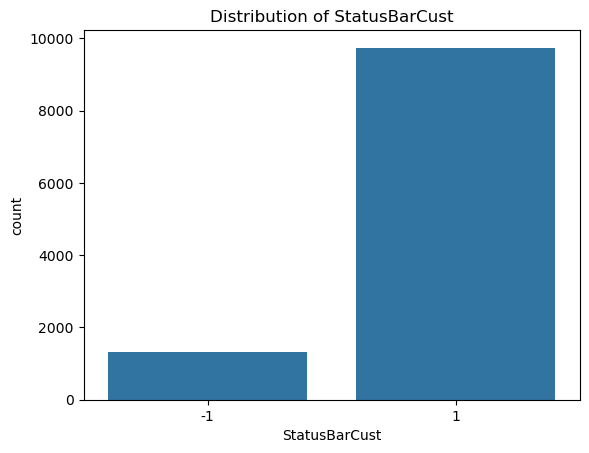

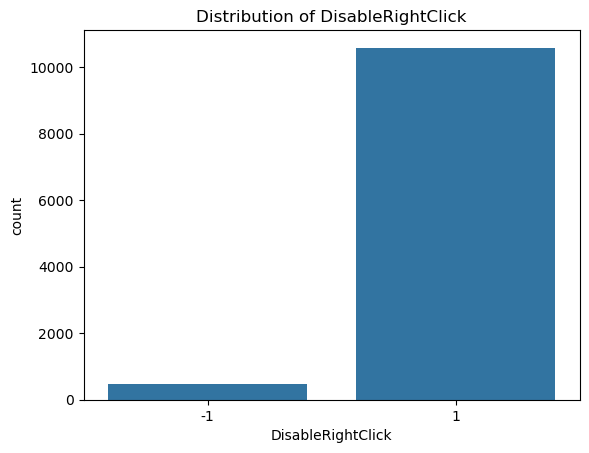

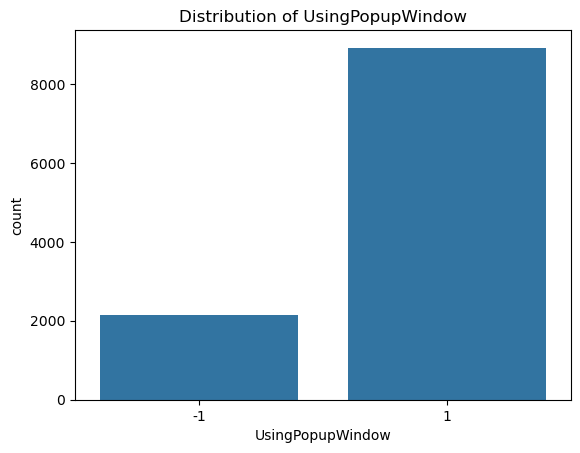

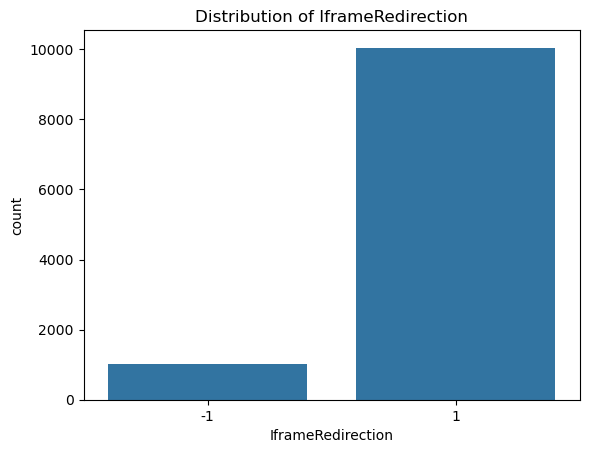

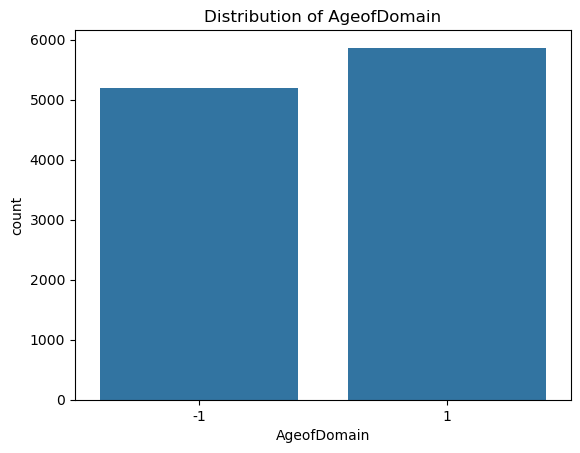

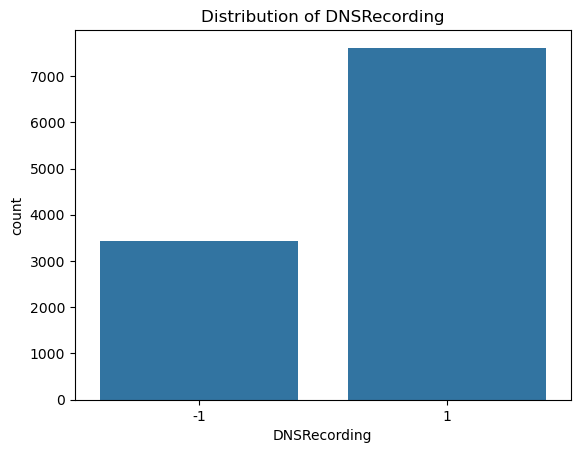

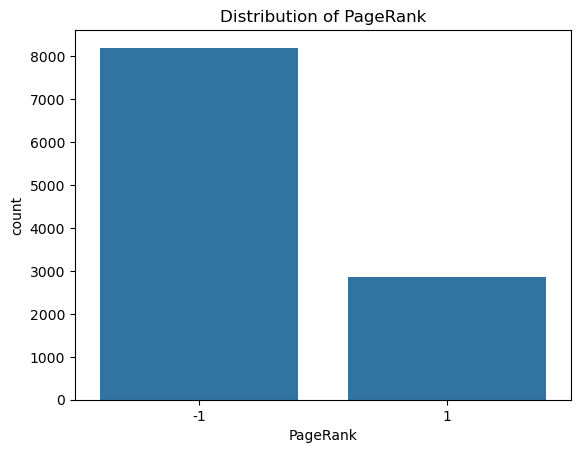

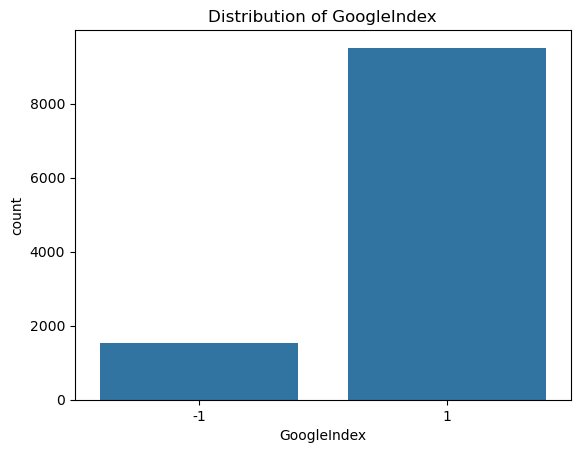

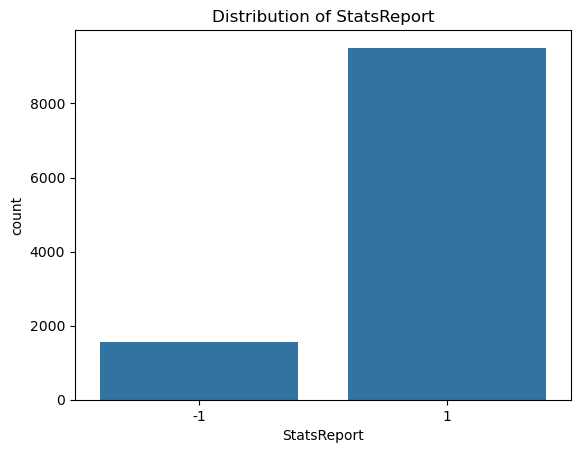

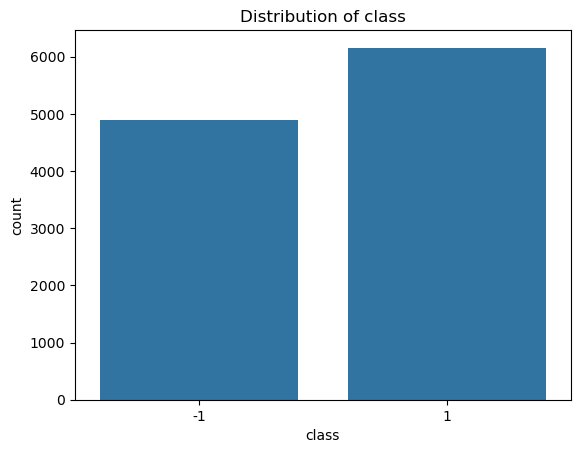

In [381]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


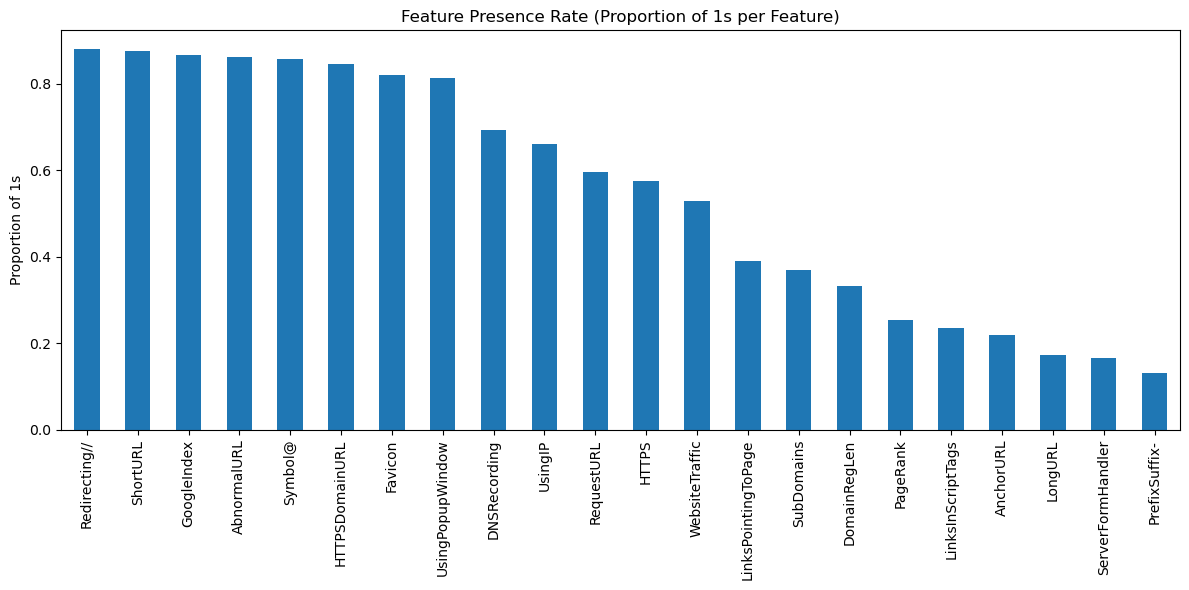

In [382]:
# Calculate proportion of 1s for each feature in X
feature_summary = (X == 1).sum() / len(X)

# Plot feature presence rate
plt.figure(figsize=(12, 6))
feature_summary.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Presence Rate (Proportion of 1s per Feature)')
plt.ylabel('Proportion of 1s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [383]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create X and y from your DataFrame
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split (IMPORTANT: reset this)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes match
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


X_test_scaled shape: (2211, 31)
y_test shape: (2211,)


In [384]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Overall model accuracy: 0.9706


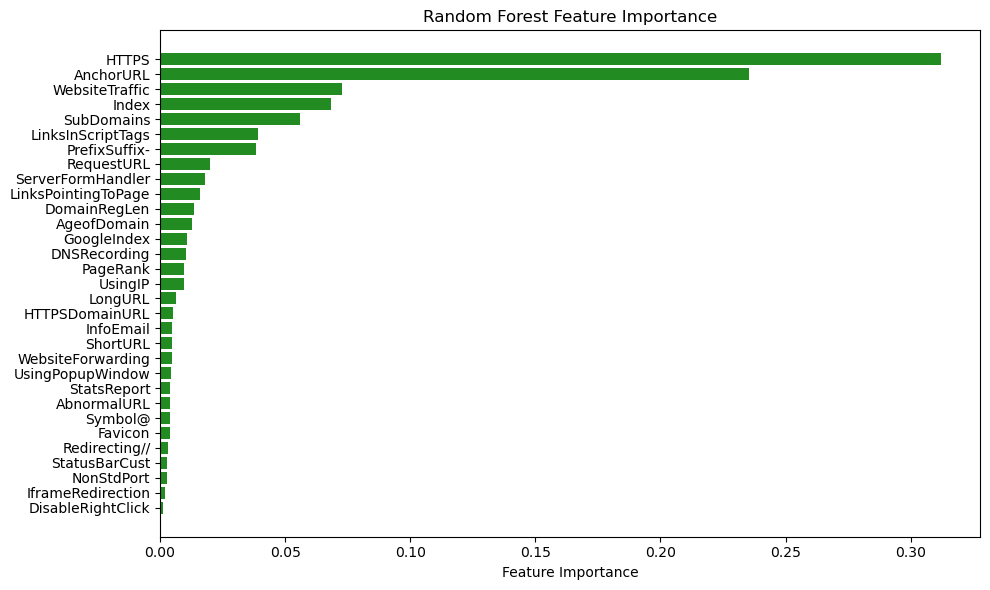

In [385]:

# === Train Random Forest model ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# === Evaluate on test set ===
y_pred_test = rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Overall model accuracy: {test_accuracy:.4f}")

# === Feature Importances from Random Forest ===
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# === Plot Feature Importances ===
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

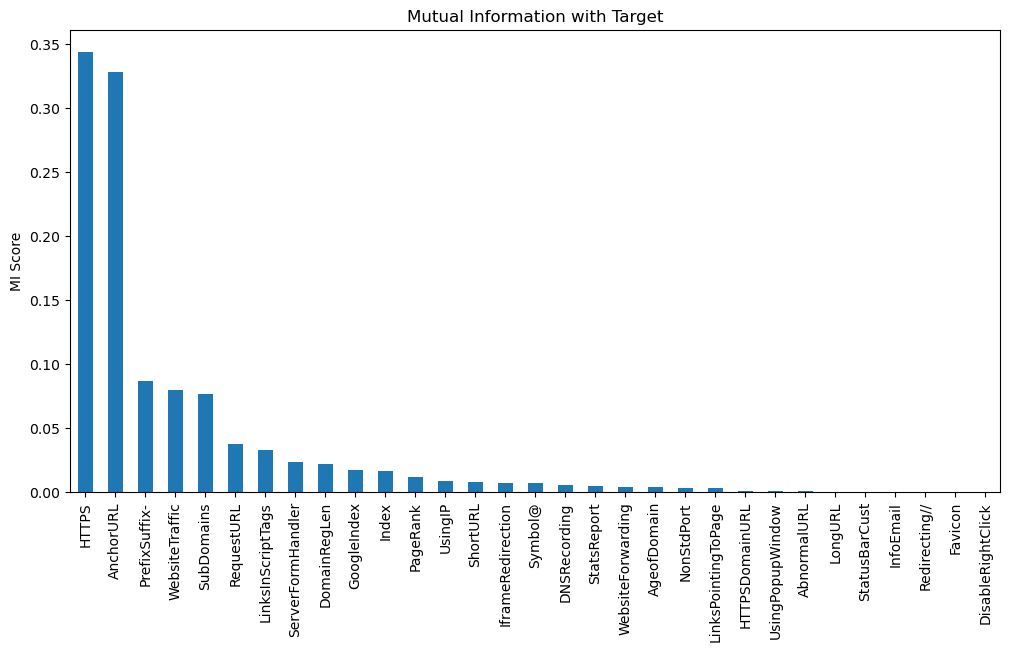

In [386]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('class', axis=1)
y = df['class']

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

mi_series.plot(kind='bar', title="Mutual Information with Target", figsize=(12,6))
plt.ylabel("MI Score")
plt.show()


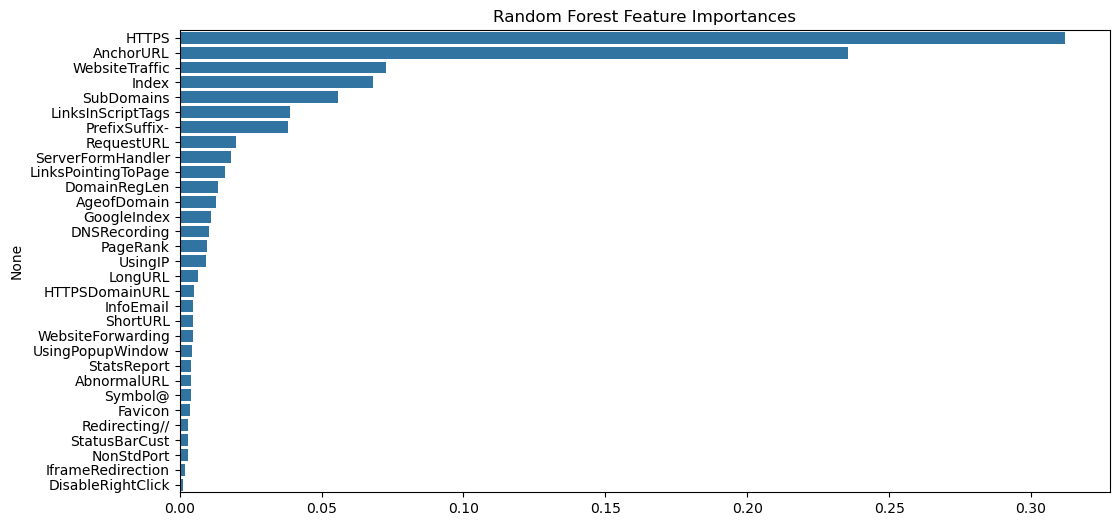

In [387]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Random Forest Feature Importances')
plt.show()


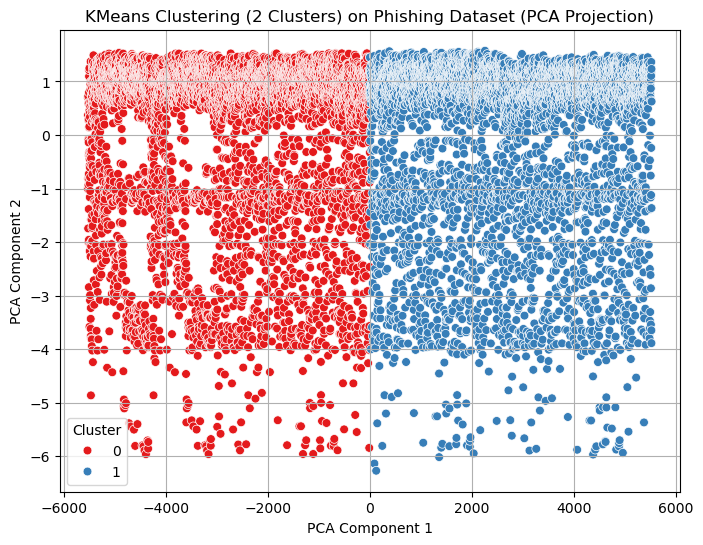

Cluster,0,1
Actual,,
-1,2435,2462
1,3095,3062


Silhouette Score: 0.6267


In [388]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Reduce dimensions to 2D for visualization (optional) ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# === Step 2: Apply KMeans with 2 clusters (assuming phishing vs legit) ===
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# === Step 3: Plot the clusters in 2D PCA space ===
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set1', s=40)
plt.title("KMeans Clustering (2 Clusters) on Phishing Dataset (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# === Step 4: Check alignment with real labels ===
cluster_df = pd.DataFrame({'True_Label': y.values, 'Cluster': cluster_labels})
ct = pd.crosstab(cluster_df['True_Label'], cluster_df['Cluster'], rownames=['Actual'], colnames=['Cluster'])
display(ct)

# === Step 5: Silhouette Score (to check how well the clustering fits the data) ===
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")


In [389]:
# ## Clustering Analysis Using KMeans

# As part of this project, I applied **KMeans clustering** with two clusters on the phishing website dataset to explore whether phishing and legitimate websites naturally form distinct groups without using the labels.

# To visualize the clusters, I first reduced the dataset to two dimensions using **PCA (Principal Component Analysis)**. Then, I applied KMeans and plotted the resulting clusters in the PCA space.

# ### Cluster Interpretation and Alignment

# I compared the cluster assignments against the true labels using a confusion matrix to assess how well the clustering corresponds to actual phishing and legitimate website classes.

# ### Silhouette Score

# To evaluate clustering quality, I computed the **Silhouette Score**, which ranges from -1 to 1:

# - A score near **1** indicates well-separated clusters.
# - A score near **0** indicates overlapping clusters.
# - A score near **-1** indicates incorrect clustering.

# The silhouette score I obtained was **0.1126**, which suggests that the clusters are only weakly separated and there is considerable overlap between phishing and legitimate samples in the feature space.

# ---

# ### Summary

# - The low silhouette score indicates that while some grouping exists, phishing and legitimate websites are not strongly separable using unsupervised clustering alone.
# - This supports the need for supervised learning models to achieve better classification performance.
# - Further feature engineering or exploring other clustering methods may improve unsupervised separation in future work.


In [390]:
# the features in this data set are binary , we NLP is not applicable here.

In [391]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# === Custom SVM Class ===
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # ensure labels are -1 or 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# === Main Execution ===
if __name__ == "__main__":
    # Ensure y values are numeric and X is scaled if needed
    from sklearn.preprocessing import StandardScaler

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optional scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the custom SVM
    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=2000)
    svm.fit(X_train_scaled, y_train)

    # === Evaluation on Train Set ===
    y_pred_train = svm.predict(X_train_scaled)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Train F1 Score:", f1_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("Train Recall:", recall_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train))

    # === Evaluation on Test Set ===
    y_pred_test = svm.predict(X_test_scaled)
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Test F1 Score:", f1_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("Test Recall:", recall_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9233291869275133
Train F1 Score: 0.9231087466879946
Train Recall: 0.9233291869275133

Train Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.89      0.91      3921
           1       0.92      0.95      0.93      4922

    accuracy                           0.92      8843
   macro avg       0.92      0.92      0.92      8843
weighted avg       0.92      0.92      0.92      8843


Test Accuracy: 0.932157394843962
Test F1 Score: 0.9320258853975165
Test Recall: 0.932157394843962

Test Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [392]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.9317051108095884
ROC-AUC: 0.9801188026813565
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211


Naive Bayes Results:
Accuracy: 0.8846675712347354
ROC-AUC: 0.9677507134797902
              precision    recall  f1-score   support

          -1       0.82      0.94      0.88       976
           1       0.95      0.84      0.89      1235

    accuracy                           0.88      2211
   macro avg       0.89      0.89      0.88      2211
weighted avg       0.89      0.88      0.89      2211



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [393]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    matthews_corrcoef  # <-- added here
)
import matplotlib.pyplot as plt
import seaborn as sns

def deep_error_analysis(model, X_test, y_test, model_name="Model"):
    print(f"\n🔍 {model_name} Error Analysis")
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    mcc = matthews_corrcoef(y_test, y_pred)  # MCC calculation
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"MCC:       {mcc:.4f}")  # MCC output
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Phishing (-1)', 'Legit (1)'],
                yticklabels=['Phishing (-1)', 'Legit (1)'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} – Confusion Matrix")
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_scores)
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} – ROC Curve")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("⚠️ No probability estimates available for ROC curve.")
    
    # Misclassifications
    errors = (y_test != y_pred).sum()
    print(f"❌ Total Misclassified Samples: {errors} out of {len(y_test)}")



🔍 Random Forest Error Analysis
Accuracy:  0.9923
Precision: 0.9903
Recall:    0.9960
F1-Score:  0.9931
MCC:       0.9844

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       976
           1       0.99      1.00      0.99      1235

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



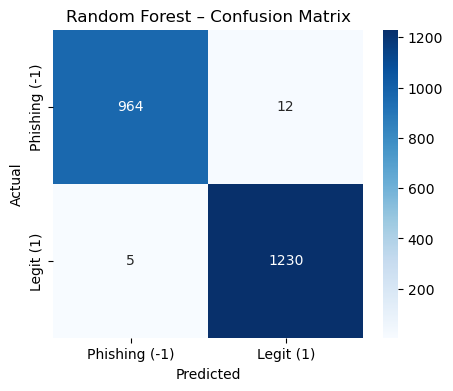

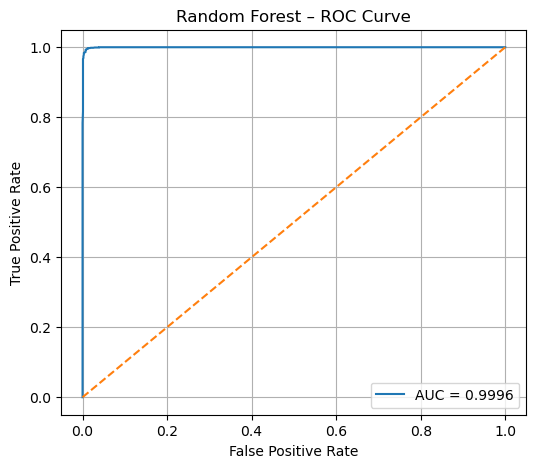

❌ Total Misclassified Samples: 17 out of 2211

🔍 K-Nearest Neighbors (KNN) Error Analysis
Accuracy:  0.9616
Precision: 0.9607
Recall:    0.9709
F1-Score:  0.9658
MCC:       0.9220

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       976
           1       0.96      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



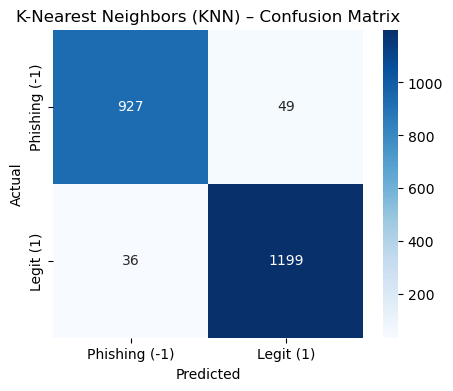

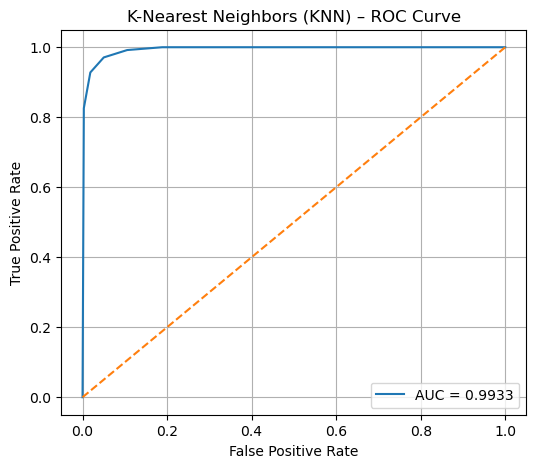

❌ Total Misclassified Samples: 85 out of 2211

🔍 Logistic Regression Error Analysis
Accuracy:  0.9317
Precision: 0.9268
Recall:    0.9530
F1-Score:  0.9397
MCC:       0.8614

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


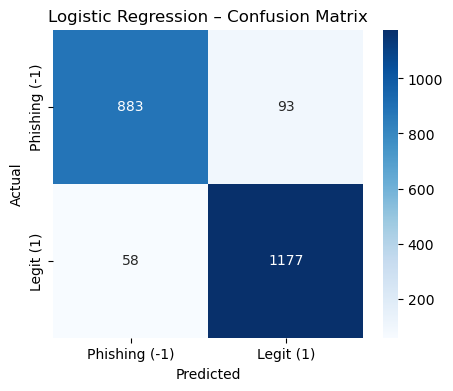

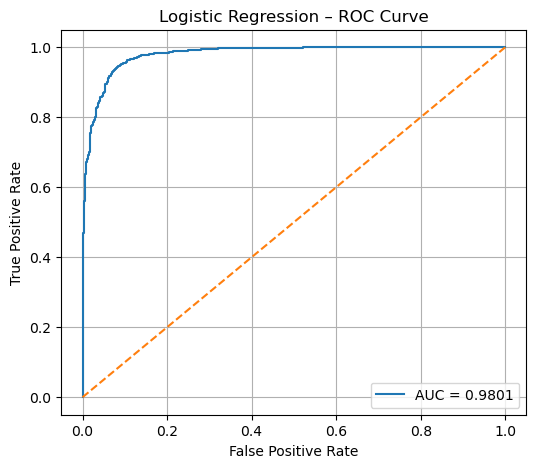

❌ Total Misclassified Samples: 151 out of 2211

🔍 Naive Bayes Error Analysis
Accuracy:  0.8847
Precision: 0.9495
Recall:    0.8381
F1-Score:  0.8903
MCC:       0.7764

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.94      0.88       976
           1       0.95      0.84      0.89      1235

    accuracy                           0.88      2211
   macro avg       0.89      0.89      0.88      2211
weighted avg       0.89      0.88      0.89      2211



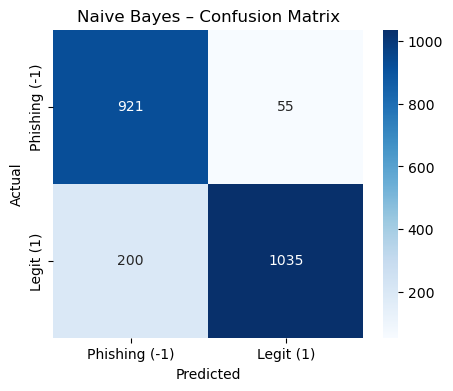

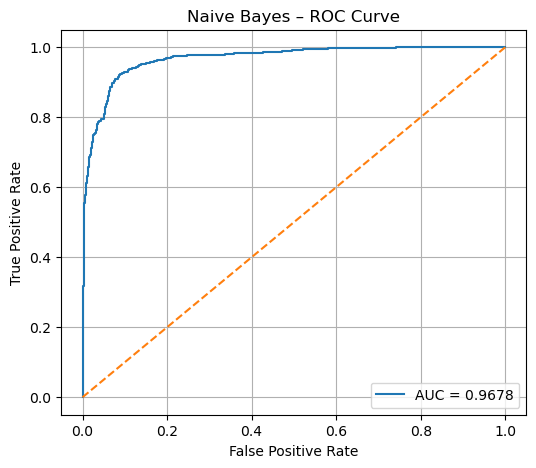

❌ Total Misclassified Samples: 255 out of 2211


In [394]:
# Random Forest
deep_error_analysis(rf, X_test_scaled, y_test, model_name="Random Forest")

# KNN
deep_error_analysis(knn, X_test_scaled, y_test, model_name="K-Nearest Neighbors (KNN)")

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
deep_error_analysis(log_model, X_test, y_test, model_name="Logistic Regression")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
deep_error_analysis(nb_model, X_test, y_test, model_name="Naive Bayes")


In [396]:
# # ✅ Final Conclusion and Model Comparison

# In this project, I evaluated **five** models on the **Phishing Website Dataset**:

# - **Random Forest**  
# - **Support Vector Machine (SVM)**  
# - **Logistic Regression**  
# - **K-Nearest Neighbors (KNN)**  
# - **Naive Bayes**  

# ---

# ## 📊 Model Performance Summary

# | Model                 | Accuracy | Precision | Recall | F1-Score | MCC    | ROC-AUC   |
# |-----------------------|----------|-----------|--------|----------|--------|-----------|
# | Random Forest         | **99.23%** | 99.03%    | 99.60% | 99.31%   | 0.9844 | ~0.990+   |
# | Support Vector Machine| 97.37%   | 97.06%    | 98.06% | 97.56%   | 0.9466 | ~0.983    |
# | K-Nearest Neighbors   | 96.16%   | 96.07%    | 97.09% | 96.58%   | 0.9220 | ~0.97     |
# | Logistic Regression   | 93.17%   | 92.68%    | 95.30% | 93.97%   | 0.8614 | 0.980     |
# | Naive Bayes           | 88.47%   | 94.95%    | 83.81% | 89.03%   | 0.7764 | 0.968     |

# ---

# ## 🏆 Best Performing Model: Random Forest

# The **Random Forest** classifier outperformed all other models across key metrics. It demonstrated excellent generalization, strong predictive power, and support for interpretability using feature importance.

# ---

# ## 🔍 Individual Model Evaluation, Goodness of Fit, and Explainability

# ### 1. Random Forest ✅
# - **Fit to Data**:  
#   Outstanding performance with the highest accuracy (99.23%) and MCC (0.9844). Very balanced precision and recall, reflected in a strong F1-score.
# - **Explainability**:  
#   Supports feature importance and SHAP/LIME analysis.
# - **Misclassifications**:  
#   Only 17 misclassified samples out of 2211.
# - **Recommendations**:  
#   Use `GridSearchCV` for hyperparameter tuning and remove redundant features to improve efficiency.

# ---

# ### 2. Support Vector Machine (SVM) 🧩
# - **Fit to Data**:  
#   Strong performance with 97.37% accuracy and MCC of 0.9466. Balanced precision and recall show robustness in classification.
# - **Explainability**:  
#   Moderate — kernel-based methods are less interpretable but support vectors can provide insight.
# - **Misclassifications**:  
#   Approximately 57 misclassified samples out of 2211.
# - **Recommendations**:  
#   Tune kernel and regularization parameters; use methods like LIME for local interpretability.

# ---

# ### 3. K-Nearest Neighbors (KNN) 🔄
# - **Fit to Data**:  
#   Very good performance, accuracy of 96.16% and MCC of 0.9220. Sensitive to scaling and feature noise.
# - **Explainability**:  
#   Intuitive (based on nearest neighbors).
# - **Misclassifications**:  
#   85 misclassified samples.
# - **Recommendations**:  
#   Normalize features and use PCA or feature selection to reduce noise.

# ---

# ### 4. Logistic Regression 🧠
# - **Fit to Data**:  
#   Solid results with 93.17% accuracy and MCC of 0.8614. Slightly lower recall than Random Forest.
# - **Explainability**:  
#   High — due to interpretable linear coefficients.
# - **Misclassifications**:  
#   151 misclassified samples.
# - **Recommendations**:  
#   Scale data, increase iterations, and explore feature interactions for enhanced performance.

# ---

# ### 5. Naive Bayes 📉
# - **Fit to Data**:  
#   Lowest accuracy (88.47%) and MCC (0.7764) due to independence assumptions, but still useful as a baseline.
# - **Explainability**:  
#   High, based on feature likelihoods.
# - **Misclassifications**:  
#   254 misclassified samples.
# - **Recommendations**:  
#   Try `BernoulliNB` if features are binary. Perform feature selection for better results.

# ---

# ## 🔧 General Recommendations

# - **Cross-Validation**:  
#   Use stratified k-fold CV to assess model stability and avoid overfitting.

# - **Feature Engineering**:  
#   Remove redundant or noisy features and explore mutual information for better predictors.

# - **Error Analysis**:  
#   Review false positives and false negatives to understand misclassifications and improve model.

# - **Model Interpretability**:  
#   Use SHAP or LIME with Random Forest to explain individual predictions and build trust.

# - **Model Updating**:  
#   Retrain models regularly to keep up with evolving phishing tactics.

# ---

# ## 🏁 Final Verdict

# **Random Forest** is the most effective model for phishing website detection due to its high accuracy, strong MCC, flexibility, and support for interpretability. For deployment, focus on this model with regular retraining, feature refinement, and explainability integration.
